In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vande-bharat/Vande Bharat.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df = pd.read_csv('/kaggle/input/vande-bharat/Vande Bharat.csv')

In [6]:
df.head()

,Sr. No.,Train Name,Train Number,Originating City,Originating Station,Terminal City,Terminal Station,Operator,No. of Cars,Frequency,Distance,Travel Time,Speed,Average Speed,Inauguration,Average occupancy
0,1,New Delhi - Varanasi Vande Bharat Express,22435/22436,Delhi,New Delhi,Varanasi,Varanasi Junction,NR,16,Except Thursdays,759 km (472 mi),08h 00m,130 km/h (81 mph),95 km/h (59 mph),2/15/2019,126%
1,2,New Delhi - Shri Mata Vaishno Devi Katra Vande...,22439/22440,Delhi,New Delhi,Katra,Shri Mata Vaishno Devi Katra,NR,16,Except Tuesdays,655 km (407 mi),08h 00m,130 km/h (81 mph),82 km/h (51 mph),10/3/2019,114%
2,3,Mumbai Central - Gandhinagar Capital Vande Bha...,20901/20902,Mumbai,Mumbai Central,Gandhinagar,Gandhinagar Capital,WR,16,Except Wednesdays,522 km (324 mi),06h 25m,130 km/h (81 mph),82 km/h (51 mph),9/30/2022,132%
3,4,New Delhi - Amb Andaura Vande Bharat Express,22447/22448,Delhi,New Delhi,Andaura,Amb Andaura,NR,16,Except Fridays,412 km (256 mi),05h 10m,130 km/h (81 mph),79 km/h (49 mph),10/13/2022,70%
4,5,MGR Chennai Central - Mysuru Vande Bharat Express,20607/20608,Chennai,Chennai Central,Mysuru,Mysore Junction,SR,16,Except Wednesdays,496 km (308 mi),06h 30m,130 km/h (81 mph),79 km/h (49 mph),11/11/2022,75%


In [7]:
df.columns

Index(['Sr. No.', 'Train Name', 'Train Number', 'Originating City',
       'Originating Station', 'Terminal City', 'Terminal Station', 'Operator',
       'No. of Cars', 'Frequency', 'Distance', 'Travel Time', 'Speed',
       'Average Speed', 'Inauguration', 'Average occupancy'],
      dtype='object')

In [8]:
df.shape

(26, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sr. No.              26 non-null     int64 
 1   Train Name           26 non-null     object
 2   Train Number         26 non-null     object
 3   Originating City     26 non-null     object
 4   Originating Station  26 non-null     object
 5   Terminal City        26 non-null     object
 6   Terminal Station     26 non-null     object
 7   Operator             26 non-null     object
 8   No. of Cars          26 non-null     int64 
 9   Frequency            26 non-null     object
 10  Distance             26 non-null     object
 11  Travel Time          26 non-null     object
 12  Speed                26 non-null     object
 13  Average Speed        26 non-null     object
 14  Inauguration         26 non-null     object
 15  Average occupancy    26 non-null     object
dtypes: int64(2

In [10]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

Sr. No.                0
Train Name             0
Train Number           0
Originating City       0
Originating Station    0
Terminal City          0
Terminal Station       0
Operator               0
No. of Cars            0
Frequency              0
Distance               0
Travel Time            0
Speed                  0
Average Speed          0
Inauguration           0
Average occupancy      0
dtype: int64

In [12]:
df.drop('Sr. No.', axis =1 , inplace =True)

In [13]:
df.nunique()

Train Name             25
Train Number           25
Originating City       15
Originating Station    18
Terminal City          25
Terminal Station       25
Operator               15
No. of Cars             2
Frequency               9
Distance               24
Travel Time            20
Speed                   5
Average Speed          17
Inauguration           18
Average occupancy      22
dtype: int64

In [14]:
for i in df:
    print(i)
    print('\n')
    print(df[i].value_counts())
    print('-'*100)

Train Name


Mumbai CSMT - Madgaon Vande Bharat Express                              2
New Delhi - Varanasi Vande Bharat Express                               1
Delhi Cantonment - Ajmer Vande Bharat Express                           1
Jodhpur - Sabarmati (Ahmedabad) Vande Bharat Express                    1
Indore - Bhopal Vande Bharat Express                                    1
Rani Kamalapati (Habibganj) - Jabalpur Vande Bharat Express             1
KSR Bengaluru - Dharwad Vande Bharat Express                            1
Patna - Ranchi Vande Bharat Express                                     1
New Jalpaiguri - Guwahati Vande Bharat Express                          1
Anand Vihar Terminal - Dehradun Vande Bharat Express                    1
Howrah - Puri Vande Bharat Express                                      1
Kasaragod - Thiruvananthapuram Vande Bharat Express                     1
MGR Chennai Central - Coimbatore Vande Bharat Express                   1
New Delhi - Shri Mata Vai

In [15]:
df.columns

Index(['Train Name', 'Train Number', 'Originating City', 'Originating Station',
       'Terminal City', 'Terminal Station', 'Operator', 'No. of Cars',
       'Frequency', 'Distance', 'Travel Time', 'Speed', 'Average Speed',
       'Inauguration', 'Average occupancy'],
      dtype='object')

Text(0.5, 0, 'No of trains')

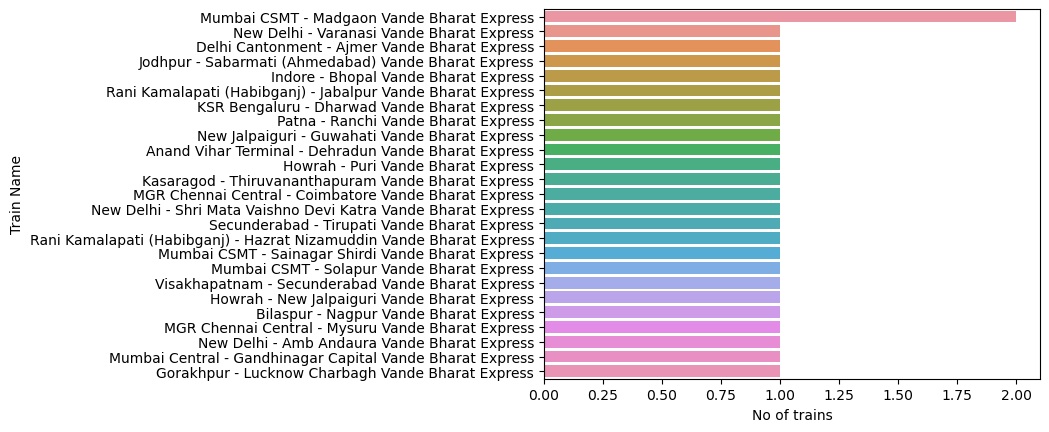

In [16]:
sns.barplot(y =df['Train Name'].value_counts().keys(), x = df['Train Name'].value_counts())
plt.title("",fontsize = 20 , fontweight ="bold")
plt.ylabel('Train Name')
plt.xlabel('No of trains')

Text(0.5, 0, 'No of Trains')

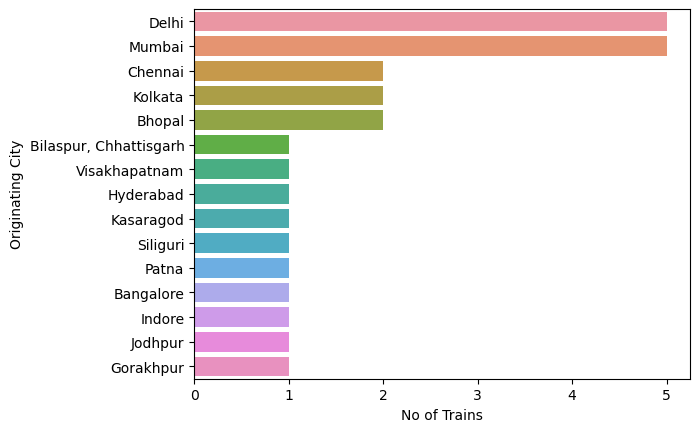

In [17]:
sns.barplot(y= df['Originating City'].value_counts().keys(),x= df['Originating City'].value_counts())
plt.ylabel('Originating City')
plt.xlabel('No of Trains')

Text(0.5, 0, 'No of Trains')

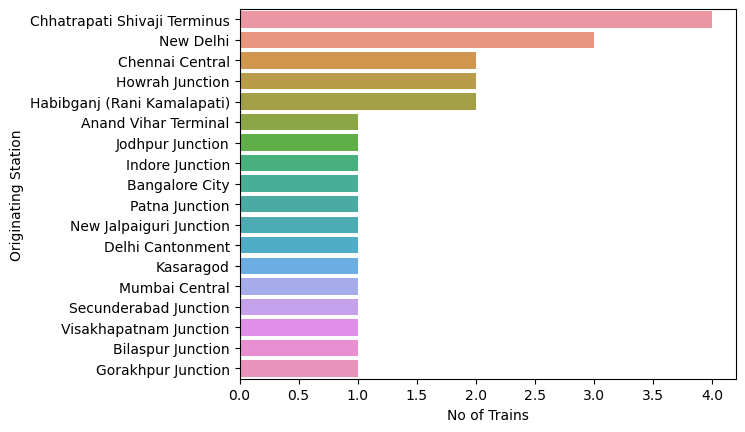

In [18]:
sns.barplot(y= df['Originating Station'].value_counts().keys(),x= df['Originating Station'].value_counts())
plt.ylabel('Originating Station')
plt.xlabel('No of Trains')

Text(0.5, 0, 'No of Trains')

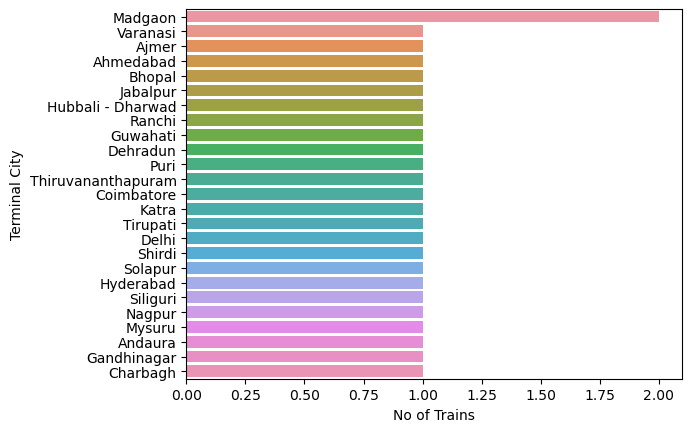

In [19]:
sns.barplot(y= df['Terminal City'].value_counts().keys(),x= df['Terminal City'].value_counts())
plt.ylabel('Terminal City')
plt.xlabel('No of Trains')

Text(0.5, 0, 'No of trains')

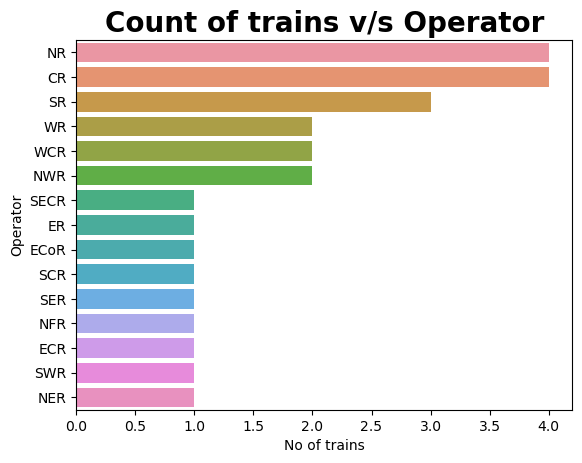

In [20]:
sns.barplot(y = df['Operator'].value_counts().keys(),x =df['Operator'].value_counts())
plt.title("Count of trains v/s Operator",fontsize = 20 , fontweight = 'bold')
plt.ylabel("Operator")
plt.xlabel('No of trains')

In [21]:
df['No. of Cars'].value_counts()

16    16
8     10
Name: No. of Cars, dtype: int64

Text(0.5, 0, 'No. of Cars')

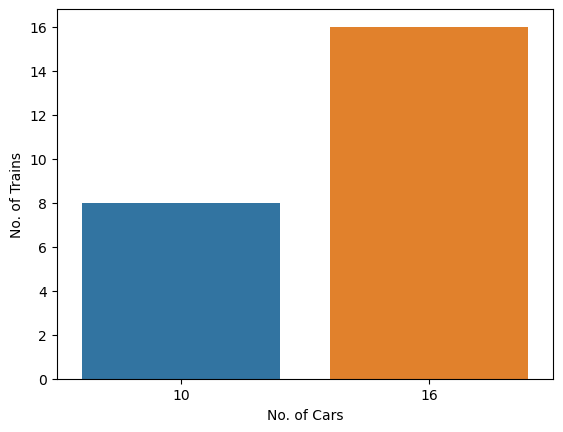

In [22]:
sns.barplot(y = df['No. of Cars'].value_counts().keys(),x = df['No. of Cars'].value_counts())
plt.ylabel('No. of Trains')
plt.xlabel('No. of Cars')

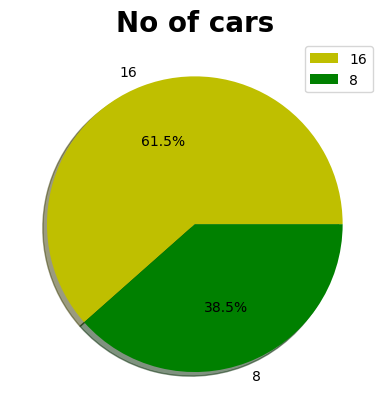

In [23]:
plt.pie(df['No. of Cars'].value_counts(),labels = df['No. of Cars'].value_counts().index,autopct = '%1.1f%%',colors=['y','g'],shadow = True)
plt.title("No of cars", fontsize = 20,fontweight='bold')
plt.legend()
plt.show()

Text(0.5, 0, 'No. of Trains')

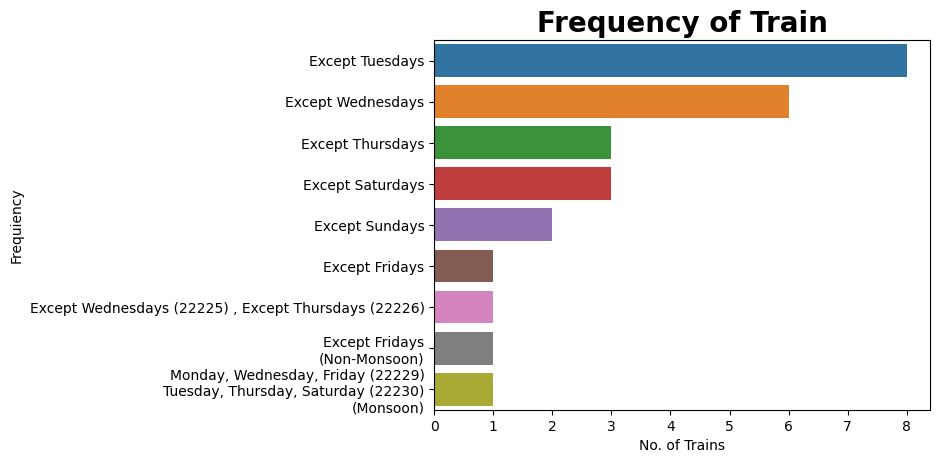

In [24]:
sns.barplot(y = df['Frequency'].value_counts().keys(),x = df['Frequency'].value_counts())
plt.title("Frequency of Train",fontsize = 20,fontweight = 'bold')
plt.ylabel('Frequiency')
plt.xlabel('No. of Trains')

In [25]:
df['Average occupancy'] = df['Average occupancy'].str.rstrip('%').astype(float)

Text(0.5, 0, 'No. of Trains')

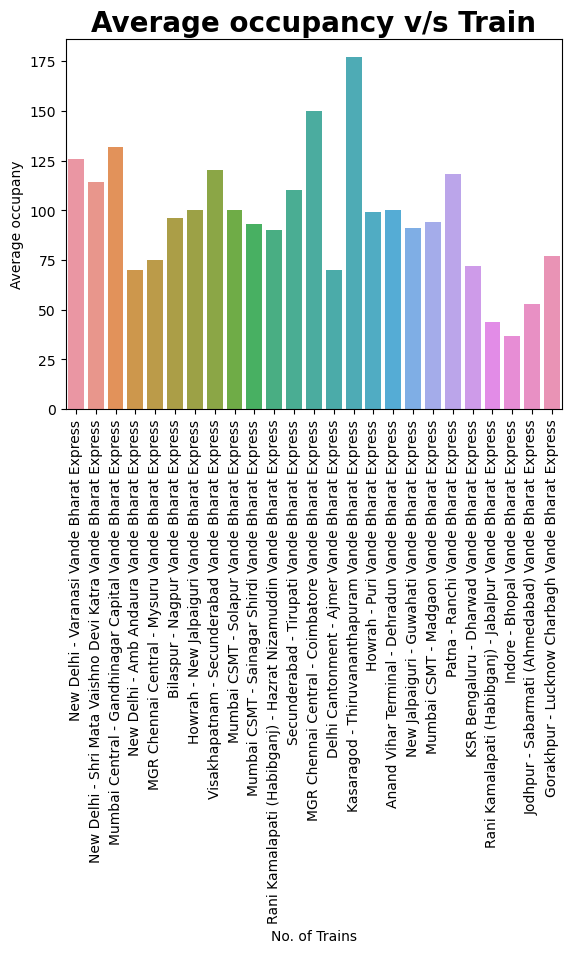

In [26]:
sns.barplot(y= 'Average occupancy',x = 'Train Name',data = df)
plt.title("Average occupancy v/s Train",fontsize = 20, fontweight='bold')
plt.xticks(rotation = 'vertical')
plt.ylabel("Average occupany")
plt.xlabel("No. of Trains")

Text(0.5, 0, 'train name')

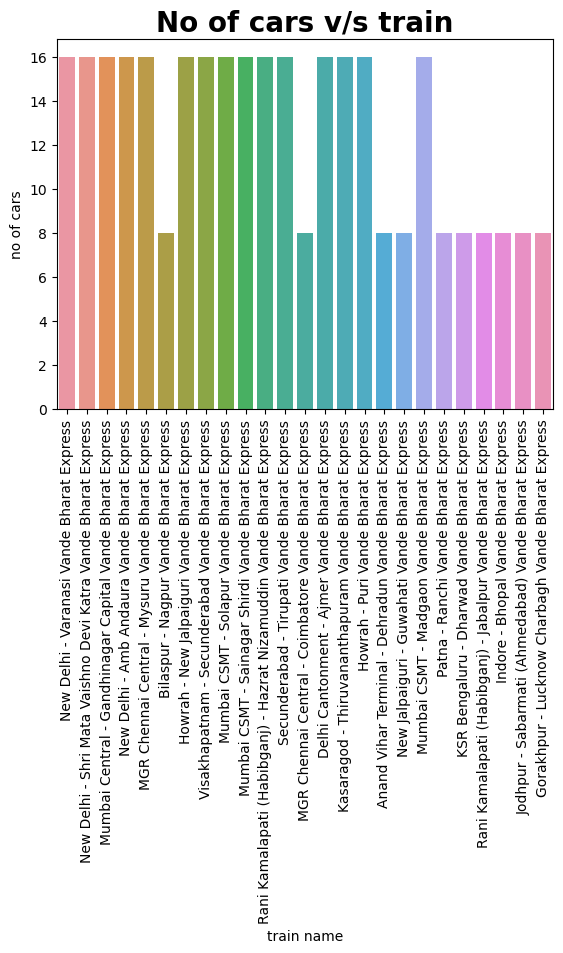

In [27]:
sns.barplot(y ='No. of Cars',x ='Train Name', data = df)
plt.title("No of cars v/s train", fontsize = 20, fontweight ='bold')
plt.xticks(rotation ='vertical')
plt.ylabel('no of cars')
plt.xlabel('train name')

In [31]:
def speed_to_kmph(speed):
    if 'km/hr' in speed:
        return float(speed.split()[0])
    elif 'mph' in speed:
        mph_value = float(speed.split()[0])
        return mph_value * 1.60934
    else:
        return None
df['Speed'] = df['Speed'].apply(speed_to_kmph)
df['Average Speed'] = df['Average Speed'].apply(speed_to_kmph)

In [32]:
df['Inauguration'] = pd.to_datetime(df['Inauguration'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Train Name           26 non-null     object        
 1   Train Number         26 non-null     object        
 2   Originating City     26 non-null     object        
 3   Originating Station  26 non-null     object        
 4   Terminal City        26 non-null     object        
 5   Terminal Station     26 non-null     object        
 6   Operator             26 non-null     object        
 7   No. of Cars          26 non-null     int64         
 8   Frequency            26 non-null     object        
 9   Distance             26 non-null     object        
 10  Travel Time          26 non-null     object        
 11  Speed                26 non-null     float64       
 12  Average Speed        26 non-null     float64       
 13  Inauguration         26 non-null     

In [35]:
df.head(3)

,Train Name,Train Number,Originating City,Originating Station,Terminal City,Terminal Station,Operator,No. of Cars,Frequency,Distance,Travel Time,Speed,Average Speed,Inauguration,Average occupancy
0,New Delhi - Varanasi Vande Bharat Express,22435/22436,Delhi,New Delhi,Varanasi,Varanasi Junction,NR,16,Except Thursdays,759 km (472 mi),08h 00m,209.2142,152.88730,2019-02-15,126.0
1,New Delhi - Shri Mata Vaishno Devi Katra Vande...,22439/22440,Delhi,New Delhi,Katra,Shri Mata Vaishno Devi Katra,NR,16,Except Tuesdays,655 km (407 mi),08h 00m,209.2142,131.96588,2019-10-03,114.0
2,Mumbai Central - Gandhinagar Capital Vande Bha...,20901/20902,Mumbai,Mumbai Central,Gandhinagar,Gandhinagar Capital,WR,16,Except Wednesdays,522 km (324 mi),06h 25m,209.2142,131.96588,2022-09-30,132.0


Text(0.5, 0, 'train name')

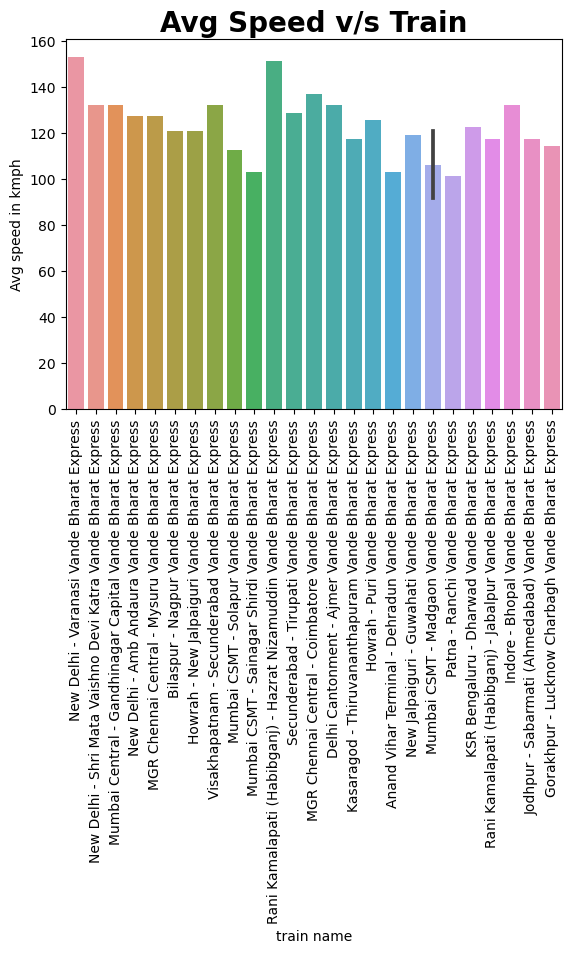

In [36]:
sns.barplot(x= 'Train Name',y ='Average Speed',data = df)
plt.title('Avg Speed v/s Train',fontsize = 20, fontweight ='bold')
plt.xticks(rotation ='vertical')
plt.ylabel('Avg speed in kmph')
plt.xlabel('train name')

In [37]:
  df['Distance'] =df['Distance'].str.extract(r'(\d+)').astype(float)

In [38]:
df['Distance']

0     759.0
1     655.0
2     522.0
3     412.0
4     496.0
5     412.0
6     565.0
7     698.0
8     452.0
9     339.0
10    702.0
11    661.0
12    495.0
13    428.0
14    587.0
15    500.0
16    304.0
17    407.0
18    586.0
19    586.0
20    379.0
21    490.0
22    337.0
23    250.0
24    449.0
25    296.0
Name: Distance, dtype: float64

Text(0.5, 0, 'Train name')

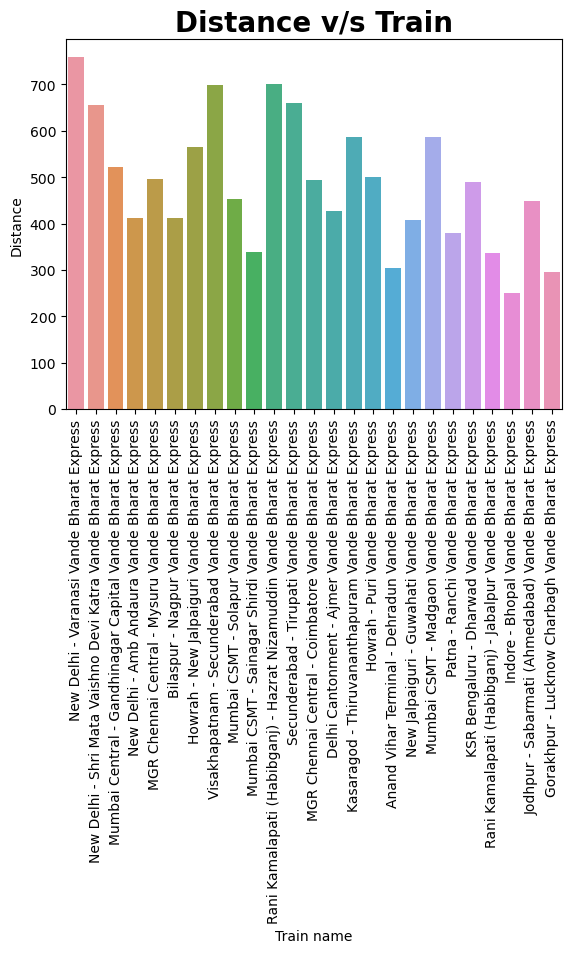

In [40]:
sns.barplot(x = 'Train Name', y ='Distance', data = df)
plt.title("Distance v/s Train",fontsize = 20, fontweight = 'bold')
plt.xticks(rotation ='vertical')
plt.ylabel("Distance")
plt.xlabel("Train name")

In [48]:
df_sorted = df.sort_values(by ='Inauguration',ascending = False)
print(df_sorted[['Train Name','Inauguration']])

                                           Train Name Inauguration
25  Gorakhpur - Lucknow Charbagh Vande Bharat Express   2023-07-07
24  Jodhpur - Sabarmati (Ahmedabad) Vande Bharat E...   2023-07-07
23               Indore - Bhopal Vande Bharat Express   2023-06-27
22  Rani Kamalapati (Habibganj) - Jabalpur Vande B...   2023-06-27
21       KSR Bengaluru - Dharwad Vande Bharat Express   2023-06-27
20                Patna - Ranchi Vande Bharat Express   2023-06-27
19         Mumbai CSMT - Madgaon Vande Bharat Express   2023-06-27
18         Mumbai CSMT - Madgaon Vande Bharat Express   2023-06-27
17     New Jalpaiguri - Guwahati Vande Bharat Express   2023-05-29
16  Anand Vihar Terminal - Dehradun Vande Bharat E...   2023-05-25
15                 Howrah - Puri Vande Bharat Express   2023-05-18
14  Kasaragod - Thiruvananthapuram Vande Bharat Ex...   2023-04-25
13      Delhi Cantonment - Ajmer Vande Bharat Express   2023-04-12
12  MGR Chennai Central - Coimbatore Vande Bharat ...   2023-0